In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

# Loading palmerpenguin and required packages

In [2]:
if(!require("tidyverse")) install.packages("tidyverse")
if(!require("palmerpenguins")) install.packages("palmerpenguins")
if(!require("ggplot2")) install.packages("ggplot2")
library("ggplot2")
library("tidyverse")
library("palmerpenguins")
data("penguins")

Loading required package: palmerpenguins



# Let's view the dataset
## head() function gives the first 6 rows of data from the datasetas as shown in the up.

In [3]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


## colnames() function gives list of all columns in dataset.

In [4]:
colnames(penguins)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

## str() and glimpse() lets see the more details about columns from dataset

In [5]:
str(penguins)
glimpse(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_m

## The penguins are of 3 species from 3 different islands

In [6]:
unique(penguins$species)
unique(penguins$island)

[1] Adelie    Gentoo    Chinstrap
Levels: Adelie Chinstrap Gentoo

[1] Torgersen Biscoe    Dream    
Levels: Biscoe Dream Torgersen

## We can see the count of penguins of different species and over the islands present in the dataset below:

In [7]:
table(penguins$species)
table(penguins$island)


   Adelie Chinstrap    Gentoo 
      152        68       124 


   Biscoe     Dream Torgersen 
      168       124        52 

# Analysing the dataset from differnt angle
## Plot for different species' penguins:

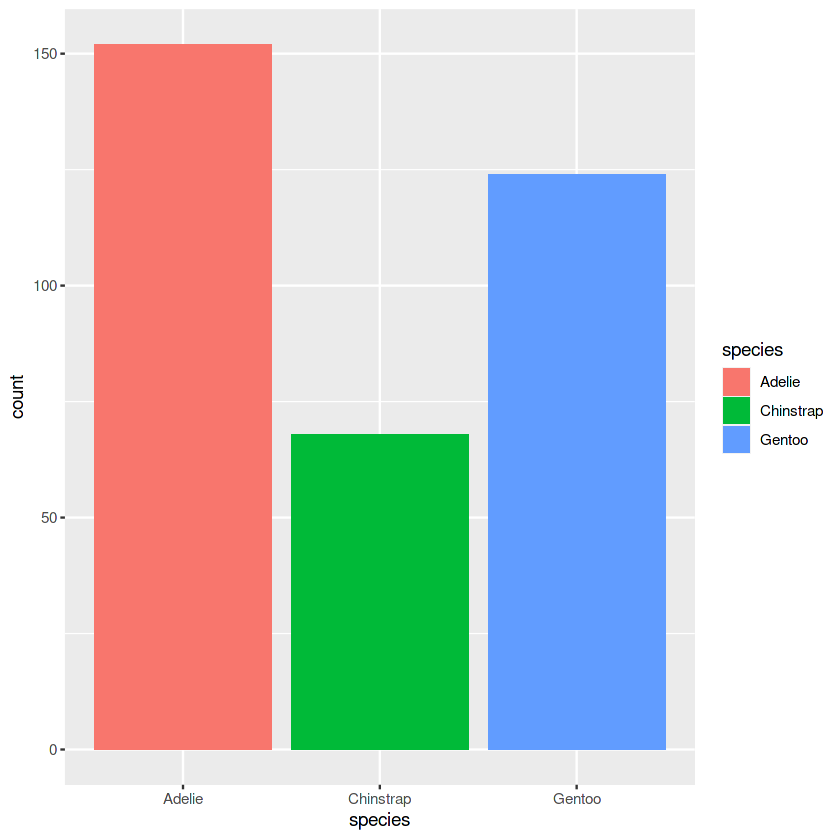

In [8]:
ggplot(data = penguins, aes(x = species, fill = species)) + geom_bar()


## Plot for number of penguins at different islands:

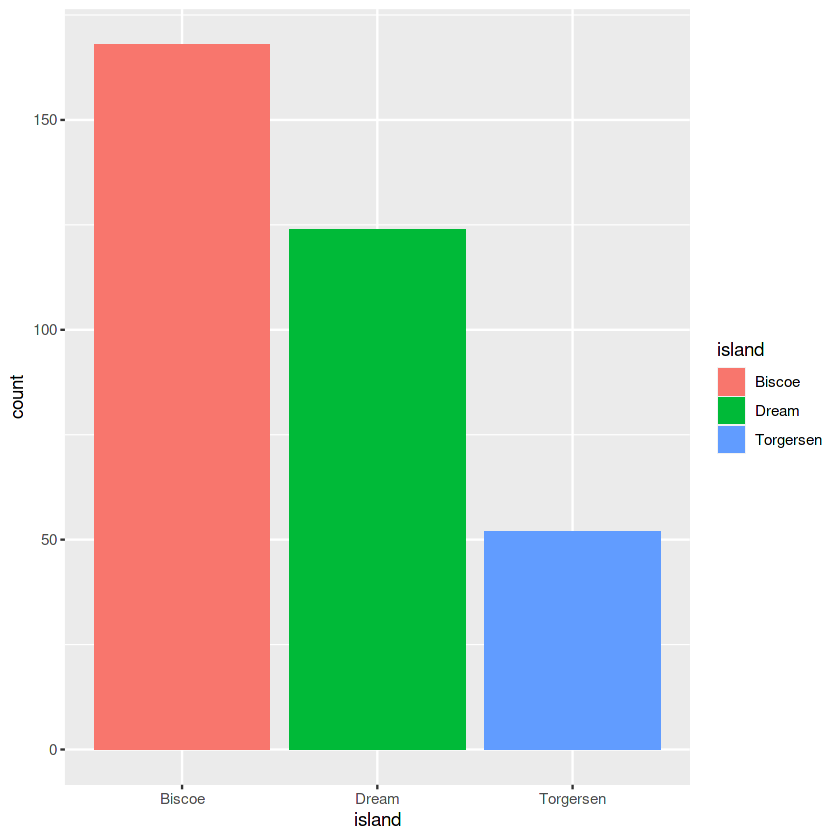

In [9]:
ggplot(data = penguins, aes(x = island, fill = island)) + geom_bar()

## Plot for number of different penguins species at different islands:

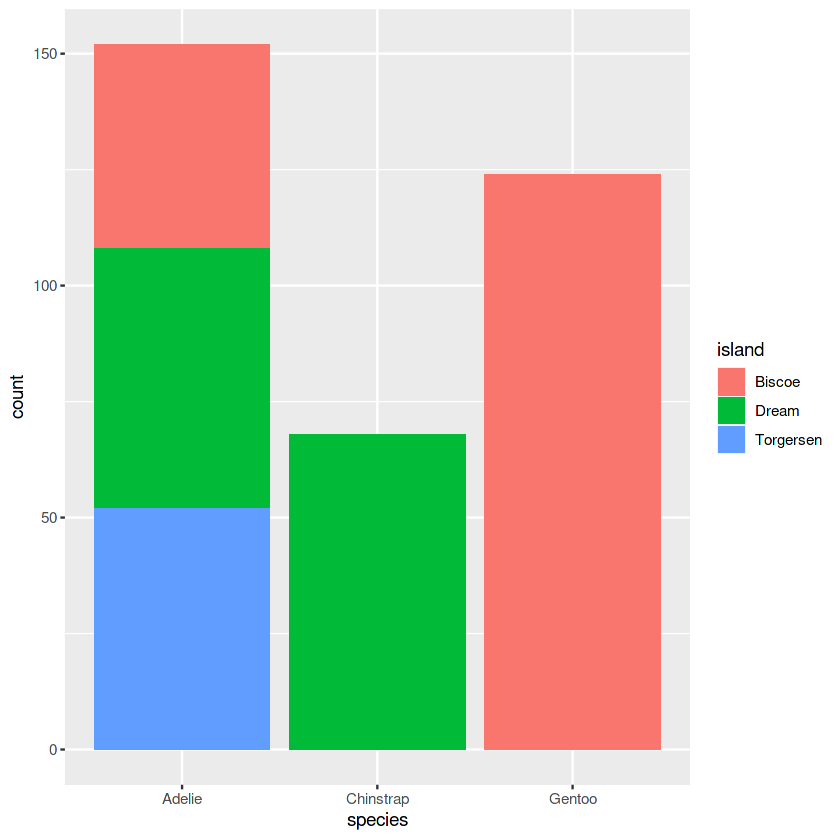

In [10]:
ggplot(data = penguins, aes(x = species, fill = island)) + geom_bar()

## Plot for Flipper length (mm) vs Body mass (g):

Warning message:
“Removed 2 rows containing missing values (geom_point).”


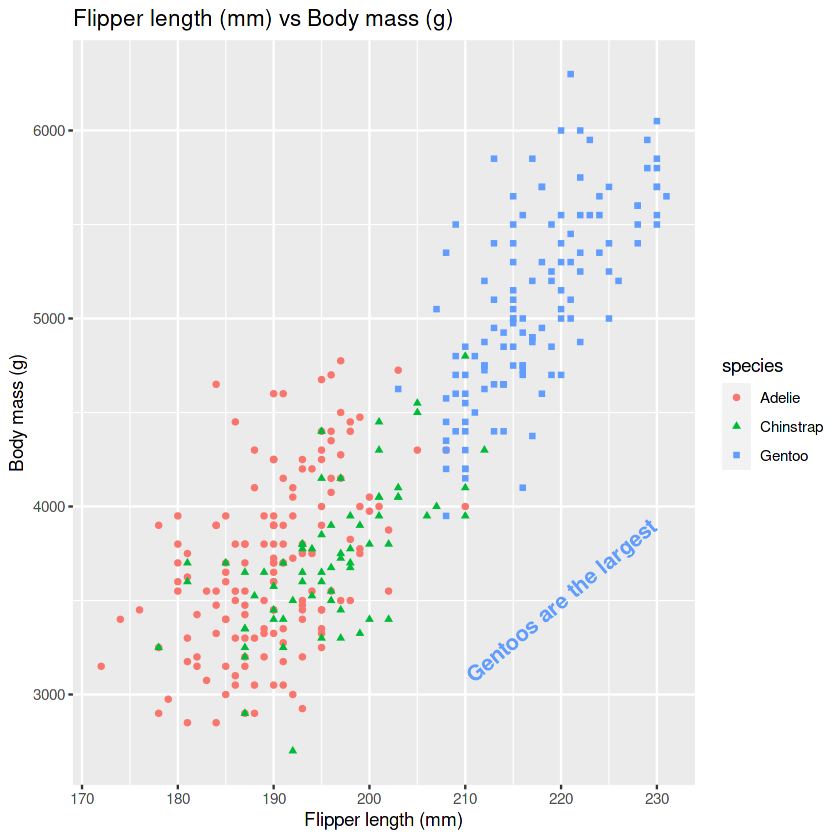

In [11]:
labs001 <- labs(title = "Flipper length (mm) vs Body mass (g)", x = "Flipper length (mm)", y = "Body mass (g)")
ggplot(data = penguins, aes(x = flipper_length_mm, y = body_mass_g, color = species, shape = species)) +
  geom_point() + labs001 +
  annotate("text", x = 220, y = 3500, label = "Gentoos are the largest", angle = 40, fontface = "bold", size = 4.5, color = "#619CFF")

## Plot for common trend in Flipper length (mm) vs Body mass (g):

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


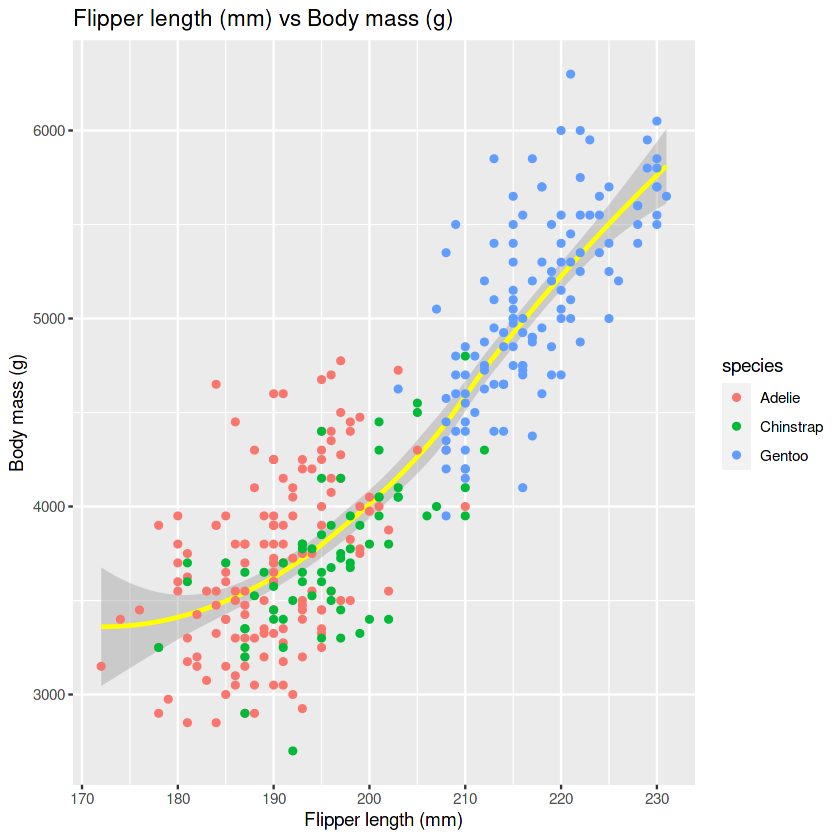

In [12]:
ggplot(data = penguins, aes(x = flipper_length_mm, y = body_mass_g)) + geom_smooth(method = "loess", color = "yellow") + geom_point(aes(color = species)) + labs001

## Plot for common trend in Flipper length (mm) vs Body mass (g) over different species:

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


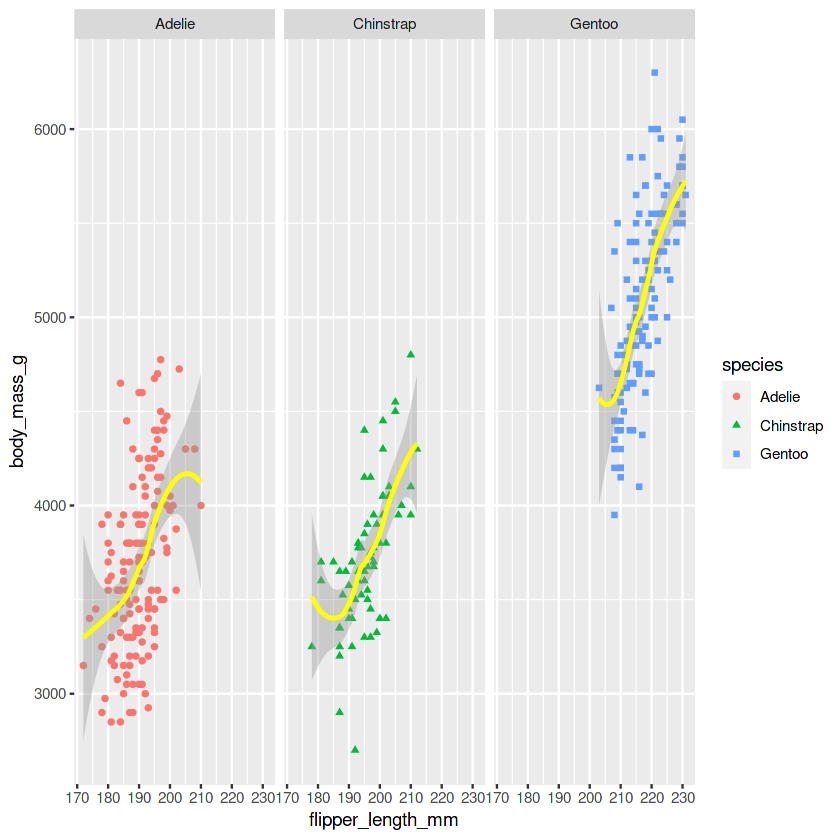

In [13]:
ggplot(data = penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point(aes(color = species, shape = species)) + geom_smooth(method = "loess", color = "yellow") +
  facet_wrap(~species)

## Plot for Species vs Sex for Flipper length (mm) vs Body mass (g):

Warning message:
“Removed 2 rows containing missing values (geom_point).”


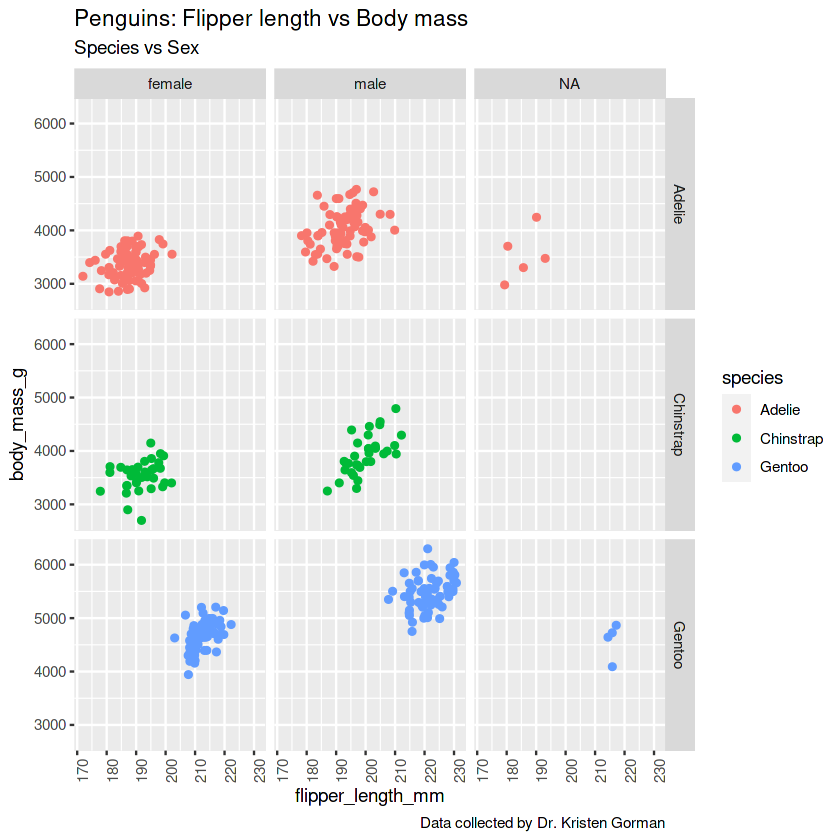

In [14]:
ggplot(data = penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_jitter(aes(color = species)) +
  facet_grid(species~sex) + labs(title = "Penguins: Flipper length vs Body mass", subtitle = "Species vs Sex", caption = "Data collected by Dr. Kristen Gorman") +
  theme(axis.text.x = element_text(angle = 90))

## Plot for Bill Length, Bill depth, Flipper length, Body mass based on sex of different species:

## First extracting the required data from data frame:

In [15]:
df <- penguins %>% 
  group_by(sex, species) %>% 
  drop_na() %>% 
  summarise(mean_bill_length = mean(bill_length_mm), mean_bill_depth = mean(bill_depth_mm), mean_flipper_length = mean(flipper_length_mm), mean_body_mass = mean(body_mass_g))
df

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,species,mean_bill_length,mean_bill_depth,mean_flipper_length,mean_body_mass
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
female,Adelie,37.25753,17.62192,187.7945,3368.836
female,Chinstrap,46.57353,17.58824,191.7353,3527.206
female,Gentoo,45.56379,14.23793,212.7069,4679.741
male,Adelie,40.39041,19.07260,192.4110,4043.493
male,Chinstrap,51.09412,19.25294,199.9118,3938.971
male,Gentoo,49.47377,15.71803,221.5410,5484.836


## Then, converting the wide format to long format

In [16]:
df_long <- pivot_longer(df, -species & -sex, names_to="variables", values_to="values")
df_long

sex,species,variables,values
<fct>,<fct>,<chr>,<dbl>
female,Adelie,mean_bill_length,37.25753
female,Adelie,mean_bill_depth,17.62192
female,Adelie,mean_flipper_length,187.79452
female,Adelie,mean_body_mass,3368.83562
female,Chinstrap,mean_bill_length,46.57353
female,Chinstrap,mean_bill_depth,17.58824
female,Chinstrap,mean_flipper_length,191.73529
female,Chinstrap,mean_body_mass,3527.20588
female,Gentoo,mean_bill_length,45.56379


## After that, plotting the long data

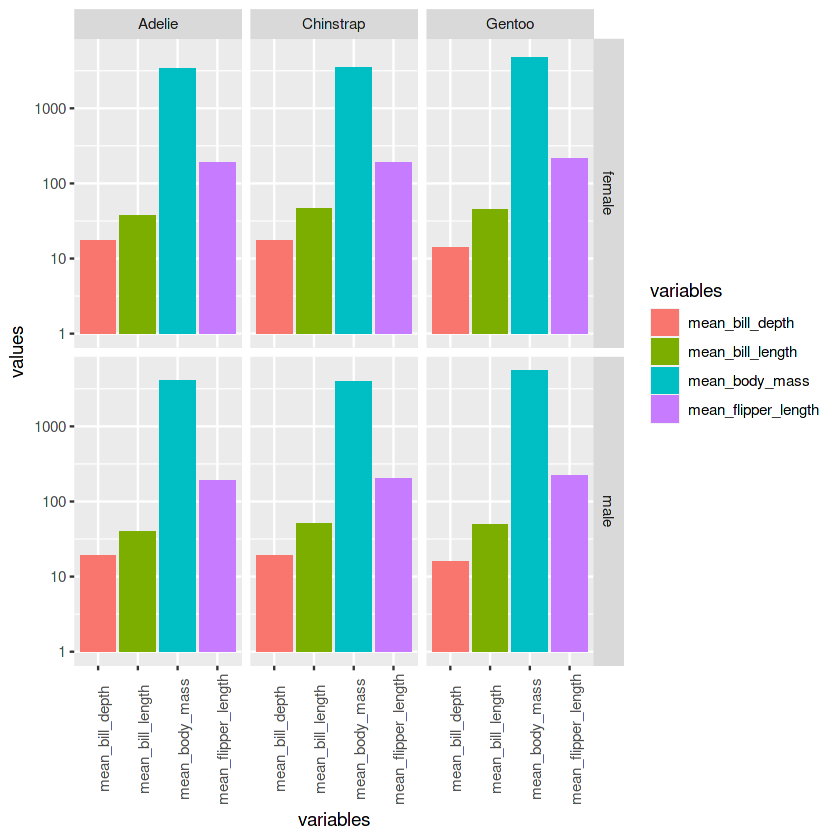

In [17]:
ggplot(df_long,aes(x = variables,y = values)) + 
  geom_bar(aes(fill = variables),stat = "identity",position = "dodge") + 
  scale_y_log10() + facet_grid(sex~species) +
  theme(axis.text.x = element_text(angle = 90))

# END